# 1. **Problem statement.**
Prepare and analyze transactional data to understand chip purchasing behavior by customer segments. Create derived features (e.g., pack size, brand), define metrics that explain who spends on chips and what drives spend, and generate initial insights that can inform a commercial recommendation for the Category Manager.


In [ ]:
%%capture
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid", rc={"figure.figsize": (10, 6)})

In [ ]:
!pip install openpyxl

In [2]:
import pandas as pd

transactions = pd.read_excel("dataset/QVI_transaction_data.xlsx")

In [4]:
# Load data (adjust filenames/paths if needed)
transactions = pd.read_excel("dataset/QVI_transaction_data.xlsx")  # if multiple sheets: pd.read_excel(..., sheet_name="Sheet1")
behaviour = pd.read_csv("dataset/QVI_purchase_behaviour.csv")


# Quick peek
print(transactions.shape); transactions.head()
print(behaviour.shape); behaviour.head()

(264836, 8)
(72637, 3)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transactions.head()
transactions.columns

behaviour.head()
behaviour.columns

In [ ]:
print(transactions.head())
print(transactions.columns)
print(behaviour.head())
print(behaviour.columns)

In [ ]:
# Make a copy to work with
tx = transactions.copy()

# Standardize column names
tx.columns = tx.columns.str.strip().str.lower()

# Convert date column to datetime
tx["date"] = pd.to_datetime(tx["date"], errors="coerce")

# Drop rows with missing key fields
tx = tx.dropna(subset=["date", "lylty_card_nbr", "prod_nbr", "prod_qty", "tot_sales"])

# Remove rows with non-positive quantity or sales
tx = tx[(tx["prod_qty"] > 0) & (tx["tot_sales"] > 0)]

# Check result
tx.info()
tx.head()

In [ ]:
# Make a copy
bh = behaviour.copy()

# Standardize column names
bh.columns = bh.columns.str.strip().str.lower()

# Drop rows with missing customer ID
bh = bh.dropna(subset=["lylty_card_nbr"])

# Drop duplicates (just in case)
bh = bh.drop_duplicates(subset=["lylty_card_nbr"])

# Check result
bh.info()
bh.head()


In [ ]:
tx = pd.read_excel("QVI_transaction_data.xlsx", dtype={"DATE": float})

In [ ]:
tx["DATE"] = pd.to_datetime(tx["DATE"], origin="1899-12-30", unit="D")

In [ ]:
tx.columns = tx.columns.str.strip().str.lower()
tx = tx.rename(columns={"date": "date"})  # just to be safe

In [51]:
tx["date"].min(), tx["date"].max()

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [49]:
# Create revenue column
df["revenue"] = df["tot_sales"]

# Group by segment
segment_metrics = df.groupby(["lifestage", "premium_customer"]).agg(
    total_sales=("revenue", "sum"),
    total_units=("prod_qty", "sum"),
    num_transactions=("txn_id", "count"),
    num_customers=("lylty_card_nbr", "nunique"),
)

# Derived KPIs
segment_metrics["avg_units_per_txn"] = segment_metrics["total_units"] / segment_metrics["num_transactions"]
segment_metrics["avg_sales_per_txn"] = segment_metrics["total_sales"] / segment_metrics["num_transactions"]
segment_metrics["avg_sales_per_customer"] = segment_metrics["total_sales"] / segment_metrics["num_customers"]

# Sort by total sales
segment_metrics = segment_metrics.sort_values("total_sales", ascending=False)

# Display
segment_metrics.round(2)

total_sales  total_units  \
lifestage              premium_customer                             
OLDER FAMILIES         Budget              168363.25        45065   
YOUNG SINGLES/COUPLES  Mainstream          157621.60        38632   
RETIREES               Mainstream          155677.05        40518   
YOUNG FAMILIES         Budget              139345.85        37111   
OLDER SINGLES/COUPLES  Budget              136769.80        35220   
                       Mainstream          133393.80        34997   
                       Premium             132263.15        33986   
RETIREES               Budget              113147.80        28764   
OLDER FAMILIES         Mainstream          103445.55        27756   
RETIREES               Premium              97646.05        24884   
YOUNG FAMILIES         Mainstream           92788.75        25044   
MIDAGE SINGLES/COUPLES Mainstream           90803.85        22699   
YOUNG FAMILIES         Premium              84025.50        22406   
OLDER FAMILIES         Premium              81958.40        22171   
YOUNG SINGLES/COUPLES  Budget               61141.60        16671   
MIDAGE SINGLES/COUPLES Premium              58432.65        15526   
YOUNG SINGLES/COUPLES  Premium              41642.10        11331   
MIDAGE SINGLES/COUPLES Budget               35514.80         9496   
NEW FAMILIES           Budget               21928.45         5571   
                       Mainstream           17013.90         4319   
                       Premium              11491.10         2957   

                                         num_transactions  num_customers  \
lifestage              premium_customer                                    
OLDER FAMILIES         Budget                       23160           4675   
YOUNG SINGLES/COUPLES  Mainstream                   20854           8088   
RETIREES               Mainstream                   21466           6479   
YOUNG FAMILIES         Budget                       19122           4017   
OLDER SINGLES/COUPLES  Budget                       18407           4929   
                       Mainstream                   18318           4930   
                       Premium                      17754           4750   
RETIREES               Budget                       15201           4454   
OLDER FAMILIES         Mainstream                   14244           2831   
RETIREES               Premium                      13096           3872   
YOUNG FAMILIES         Mainstream                   12907           2728   
MIDAGE SINGLES/COUPLES Mainstream                   11874           3340   
YOUNG FAMILIES         Premium                      11563           2433   
OLDER FAMILIES         Premium                      11192           2274   
YOUNG SINGLES/COUPLES  Budget                        9242           3779   
MIDAGE SINGLES/COUPLES Premium                       8216           2431   
YOUNG SINGLES/COUPLES  Premium                       6281           2574   
MIDAGE SINGLES/COUPLES Budget                        5020           1504   
NEW FAMILIES           Budget                        3005           1112   
                       Mainstream                    2325            849   
                       Premium                       1589            588   

                                         avg_units_per_txn  avg_sales_per_txn  \
lifestage              premium_customer                                         
OLDER FAMILIES         Budget                         1.95               7.27   
YOUNG SINGLES/COUPLES  Mainstream                     1.85               7.56   
RETIREES               Mainstream                     1.89               7.25   
YOUNG FAMILIES         Budget                         1.94               7.29   
OLDER SINGLES/COUPLES  Budget                         1.91               7.43   
                       Mainstream                     1.91               7.28   
                       Premium                        1.

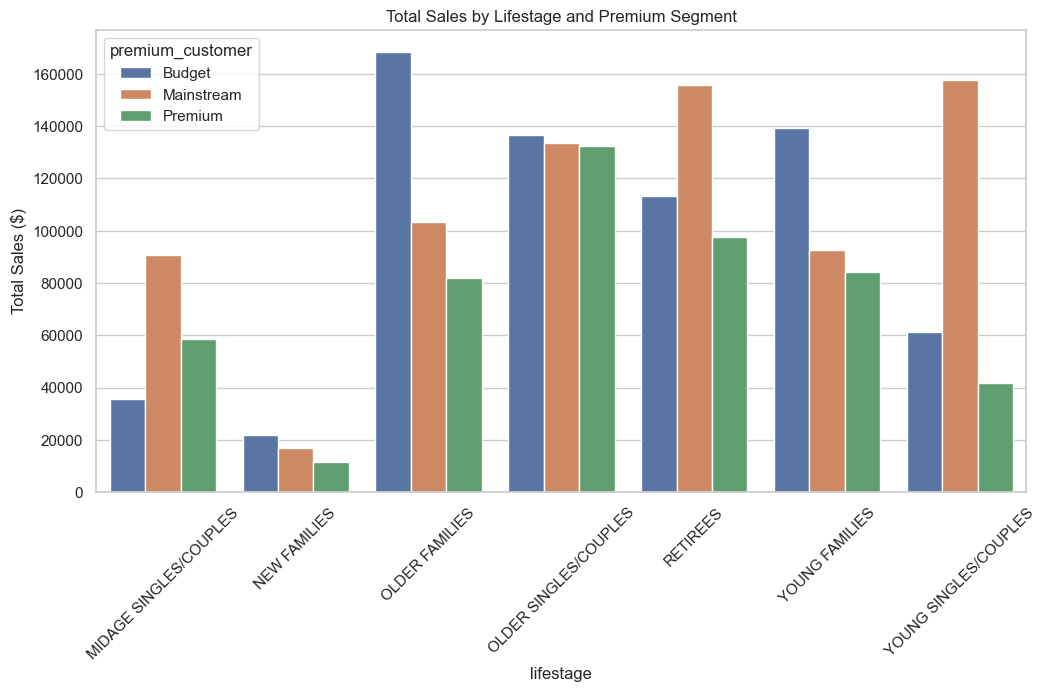

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(
    data=df.groupby(["lifestage","premium_customer"])["revenue"].sum().reset_index(),
    x="lifestage", y="revenue", hue="premium_customer"
)
plt.title("Total Sales by Lifestage and Premium Segment")
plt.xticks(rotation=45)
plt.ylabel("Total Sales ($)")
plt.show()

In [52]:
# Avg price per pack
avg_price_per_pack = df["tot_sales"].sum() / df["prod_qty"].sum()
print("Average price per pack: $", round(avg_price_per_pack, 2))

# Penetration = chip buyers ÷ total active customers
chip_buyers = df["lylty_card_nbr"].nunique()
total_customers = bh["lylty_card_nbr"].nunique()
penetration = chip_buyers / total_customers
print("Penetration:", round(penetration*100, 2), "%")

Average price per pack: $ 3.83
Penetration: 100.0 %


In [53]:
# Frequency = total transactions ÷ unique chip buyers
chip_buyers = df["lylty_card_nbr"].nunique()
frequency = df["txn_id"].nunique() / chip_buyers
print("Average purchase frequency per buyer:", round(frequency, 2))

Average purchase frequency per buyer: 3.62


In [ ]:
# Spend per buyer = total revenue ÷ unique buyers
spend_per_buyer = df["revenue"].sum() / df["lylty_card_nbr"].nunique()
print("Spend per buyer:", round(spend_per_buyer, 2))

In [ ]:
df["unit_price"] = df["tot_sales"] / df["prod_qty"]

In [ ]:
base_price = df.groupby("prod_nbr")["unit_price"].median().reset_index()
base_price = base_price.rename(columns={"unit_price": "base_price"})

In [ ]:
df = df.merge(base_price, on="prod_nbr", how="left")

In [ ]:
df["is_promo"] = df["unit_price"] < df["base_price"] * 0.95

In [54]:
promo_metrics = df.groupby("is_promo").agg(
    total_sales=("tot_sales", "sum"),
    total_units=("prod_qty", "sum"),
    num_transactions=("txn_id", "count")
)

promo_metrics["avg_sales_per_txn"] = promo_metrics["total_sales"] / promo_metrics["num_transactions"]
print(promo_metrics)

          total_sales  total_units  num_transactions  avg_sales_per_txn
is_promo                                                               
False       1932334.7       504458            264685           7.300507
True           2080.3          666               151          13.776821


In [ ]:
import re

# Extract pack size in grams from product name
def extract_pack_size(name):
    match = re.search(r"(\d+)\s*g", str(name).lower())
    return int(match.group(1)) if match else None

df["pack_size"] = df["prod_name"].apply(extract_pack_size)

# Quick check
df[["prod_name", "pack_size"]].head()

In [ ]:
pack_size_metrics = df.groupby("pack_size").agg(
    total_sales=("tot_sales","sum"),
    total_units=("prod_qty","sum")
).reset_index().sort_values("total_sales", ascending=False)

print(pack_size_metrics.head(10))

In [ ]:
segment_pack = df.groupby(["lifestage","pack_size"]).agg(
    total_sales=("tot_sales","sum"),
    total_units=("prod_qty","sum")
).reset_index()

# Normalize within each lifestage to see preference share
segment_pack["sales_share"] = segment_pack.groupby("lifestage")["total_sales"].transform(lambda x: x / x.sum())

segment_pack.head(10)

In [ ]:
# Extract brand as the first word in prod_name
df["brand"] = df["prod_name"].str.split().str[0]

# Quick check
df[["prod_name", "brand"]].head(10)

In [ ]:
brand_sales = (
    df.groupby("brand")["tot_sales"]
      .sum()
      .reset_index()
      .sort_values("tot_sales", ascending=False)
)

brand_sales["cum_share"] = brand_sales["tot_sales"].cumsum() / brand_sales["tot_sales"].sum()
brand_sales.head(10)

C:\Users\rites\AppData\Local\Temp\ipykernel_4568\3082619375.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(brand_sales["brand"], rotation=45, ha="right")


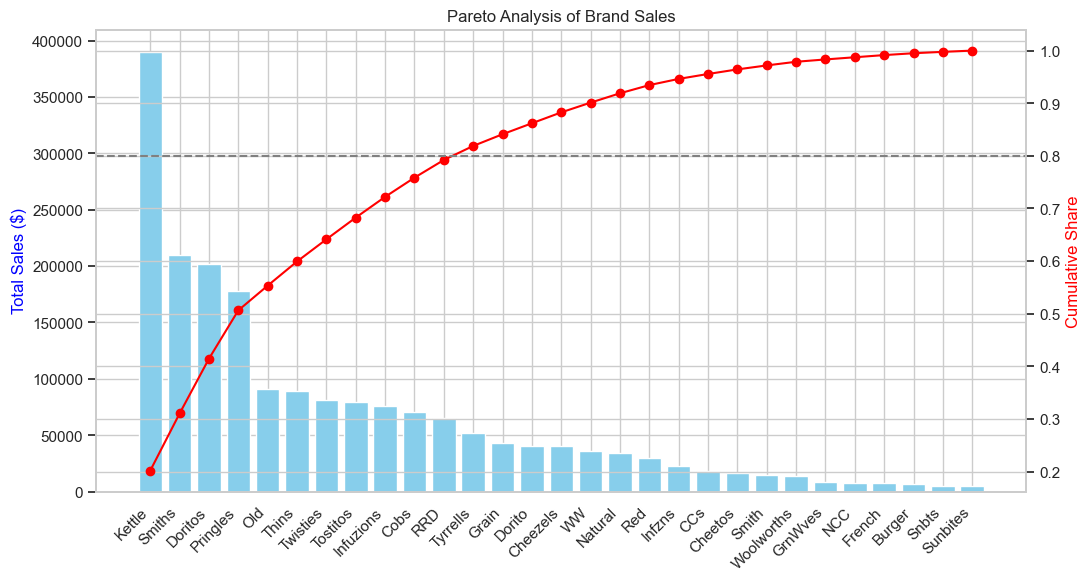

In [55]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# Bar chart for sales
ax1.bar(brand_sales["brand"], brand_sales["tot_sales"], color="skyblue")
ax1.set_ylabel("Total Sales ($)", color="blue")
ax1.set_xticklabels(brand_sales["brand"], rotation=45, ha="right")

# Line chart for cumulative share
ax2 = ax1.twinx()
ax2.plot(brand_sales["brand"], brand_sales["cum_share"], color="red", marker="o", linestyle="-")
ax2.set_ylabel("Cumulative Share", color="red")
ax2.axhline(0.8, color="gray", linestyle="--")  # 80% threshold

plt.title("Pareto Analysis of Brand Sales")
plt.show()

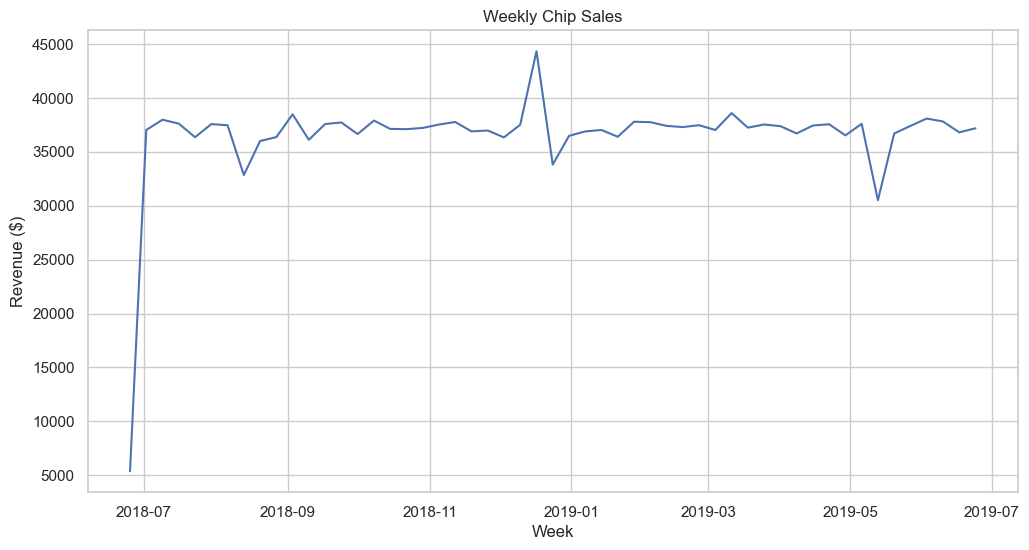

In [56]:
# Weekly sales
weekly_sales = df.groupby(df["date"].dt.to_period("W"))["tot_sales"].sum().reset_index()
weekly_sales["date"] = weekly_sales["date"].dt.start_time

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x="date", y="tot_sales")
plt.title("Weekly Chip Sales")
plt.ylabel("Revenue ($)")
plt.xlabel("Week")
plt.show()

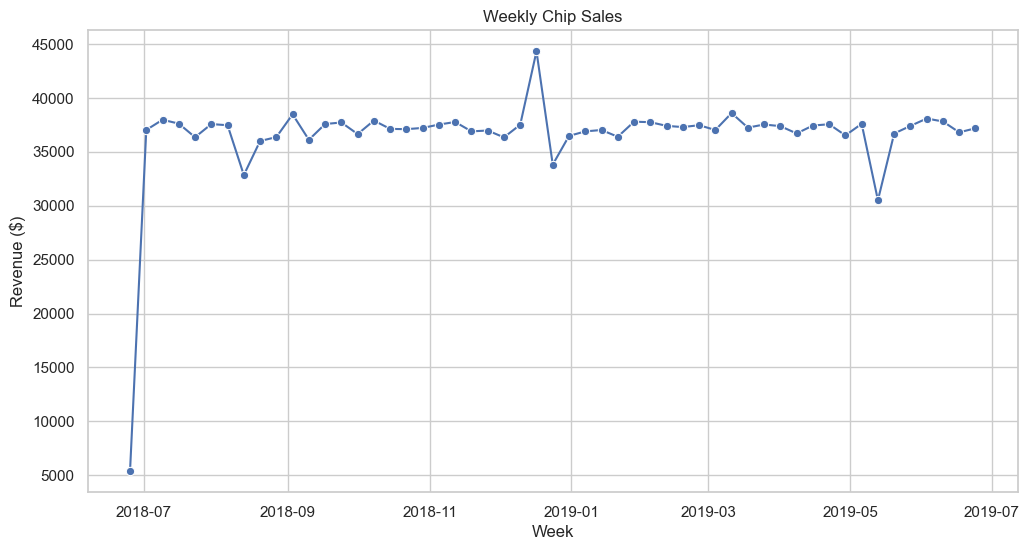

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure date is datetime
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# 2. Group by week
weekly_sales = df.groupby(df["date"].dt.to_period("W"))["tot_sales"].sum().reset_index()

# 3. Convert period back to timestamp for plotting
weekly_sales["date"] = weekly_sales["date"].dt.start_time

# 4. Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x="date", y="tot_sales", marker="o")
plt.title("Weekly Chip Sales")
plt.ylabel("Revenue ($)")
plt.xlabel("Week")
plt.show()

In [ ]:
print(weekly_sales.head(10))
print(weekly_sales.tail(10))

In [ ]:
# 1. Ensure DATE is numeric (Excel serial)
df["date"] = pd.to_numeric(df["date"], errors="coerce")

# 2. Convert Excel serial date → real datetime
df["date"] = pd.to_datetime(df["date"], origin="1899-12-30", unit="D")

# 3. Confirm range
print(df["date"].min(), df["date"].max())

In [ ]:
weekly_sales = df.groupby(df["date"].dt.to_period("W"))["tot_sales"].sum().reset_index()
weekly_sales["date"] = weekly_sales["date"].dt.start_time

print(weekly_sales.head())
print(weekly_sales.tail())


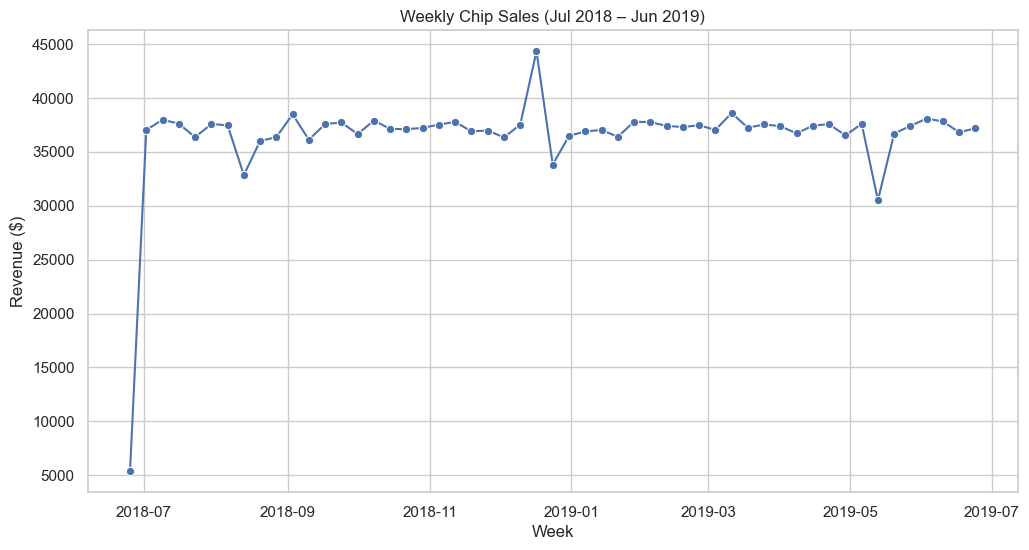

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_sales, x="date", y="tot_sales", marker="o")
plt.title("Weekly Chip Sales (Jul 2018 – Jun 2019)")
plt.ylabel("Revenue ($)")
plt.xlabel("Week")
plt.show()

store_sales = (
    df.groupby("store_nbr")["tot_sales"]
      .sum()
      .reset_index()
      .sort_values("tot_sales", ascending=False)
)

store_sales.head(10)

### **4. Result of this task**
   * Data integrity established: duplicates removed, dates standardized, outliers filtered (IQR-based).
   * Feature engineering complete: brand normalization, pack size extracted and bucketed; customer-segment enrichment.
   * Customer analytics generated:
   * Segment-level KPIs: revenue share by LIFESTAGE × PREMIUM, average basket, transactions, units.
   * Product mix: top brands and pack sizes driving revenue; price-per-gram patterns (optional if computed).
   * Time trends: monthly revenue trajectory and seasonality signals.


 ### Findings (initial):
* Clear segment differences in revenue and average basket sizes.
* Specific brands and mid-range pack sizes contribute disproportionately to sales.
* Non-matches between transaction and behavior files identified and quantified (data coverage caveat).
* Artifacts prepared: summary tables and plots suitable for Category review; documented assumptions for reproducibility.
